<a href="https://colab.research.google.com/github/Sereniiti/ai-models/blob/main/Ngrams_Sentiment_analysis_model_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download ("stopwords")

import matplotlib.pyplot as plt
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Training data (sentences) - Dataset.csv')
df.head ()

,en,fr,rating,Step,Tips in the steps (WIP),Alert,Comment
0,A 2014 study examined the effects of combined ...,Une étude de 2014 a examiné les effets d'une f...,4,facts,factual,NaN,NaN
1,Boys don't cry,Un grand garçon ne pleure pas,2,facts,"judgement, generalization, label",NaN,NaN
2,"A cheetah, the fastest land animal, can run 70...","Un guépard, l'animal terrestre le plus rapide,...",4,facts,factual,NaN,NaN
3,A combination of words that makes sense is cal...,Une combinaison de mots qui a un sens complet ...,4,facts,factual,NaN,NaN
4,A door would have more charisma than you,Une porte aurait plus de charisme que toi,0,facts,"judgement, generalization, label",NaN,NaN


In [10]:
df=df.drop(['fr', 'Step', 'Tips in the steps (WIP)', 'Alert', 'Comment',],axis=1)
df.dropna(inplace=True)

In [11]:
df

,en,rating
0,A 2014 study examined the effects of combined ...,4
1,Boys don't cry,2
2,"A cheetah, the fastest land animal, can run 70...",4
3,A combination of words that makes sense is cal...,4
4,A door would have more charisma than you,0
...,...,...
10988,it was violent and gratuitous it was mean,1
10989,You say that but I assure you that in normal c...,1
10990,You really went too far,1
10991,It was mean,1


In [12]:
df ['Violence_Rating']=df ['rating'].apply(lambda x: 0 if x >= 4 else 1)

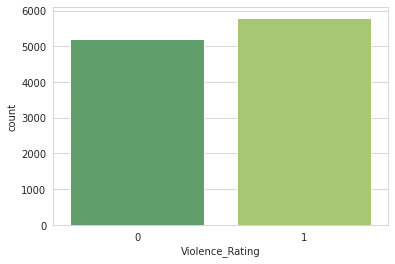

In [13]:
sns.set_style ('whitegrid')
sns.countplot (x='Violence_Rating', data=df, palette='summer')

In [14]:
def get_text_processing(text):
    stpword = ['the','a', 'an']
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [15]:
df['en_processed'] = df['en'].apply(get_text_processing)
df.head()

,en,rating,Violence_Rating,en_processed
0,A 2014 study examined the effects of combined ...,4,0,2014 study examined effects of combined NVC an...
1,Boys don't cry,2,1,Boys dont cry
2,"A cheetah, the fastest land animal, can run 70...",4,0,cheetah fastest land animal can run 70 miles hour
3,A combination of words that makes sense is cal...,4,0,combination of words that makes sense is calle...
4,A door would have more charisma than you,0,1,door would have more charisma than you


In [16]:
df = df[['en_processed', 'Violence_Rating']]
df.head()

,en_processed,Violence_Rating
0,2014 study examined effects of combined NVC an...,0
1,Boys dont cry,1
2,cheetah fastest land animal can run 70 miles hour,0
3,combination of words that makes sense is calle...,0
4,door would have more charisma than you,1


In [17]:
dft = df.sample (n=10000, random_state=100)
dfr = df.drop (dft.index)
dfr

,en_processed,Violence_Rating
2,cheetah fastest land animal can run 70 miles hour,0
6,group of words which makes complete sense is c...,0
7,little hello and kiss from our son,0
18,According to this article volcanoes in Auvergn...,0
32,After long hot night we spent together I feel ...,0
...,...,...
10863,I am only doing this for you,1
10897,You should go out more,1
10917,You think you dont need anyone but in fact you...,1
10963,I love you as big as truck,0


In [18]:
dft

,en_processed,Violence_Rating
3305,Im good at English grammar,0
5410,We have received confirmation that this attack...,0
7475,You think youre alone in world,1
4573,Now that I know that I am selected I feel much...,0
1139,He thinks hes only one with something interest...,1
...,...,...
2502,I love you much more than you love me,1
6304,You are not good husband,1
3733,Im really unhappy with my life,0
3178,Im feeling very tired,0


In [19]:
X1 = dft["en_processed"].values
X2= dfr["en_processed"].values
X3= dfr["en_processed"].values
Y1= dft.drop("en_processed", axis=1).values
Y2= dfr.drop("en_processed", axis=1).values
X1_train, X1_test, Y1_train, Y1_test=train_test_split(X1,Y1, test_size=0.30, random_state=42)


In [20]:
dfffff = pd.DataFrame (X1)
dfffff

,0
0,Im good at English grammar
1,We have received confirmation that this attack...
2,You think youre alone in world
3,Now that I know that I am selected I feel much...
4,He thinks hes only one with something interest...
...,...
9995,I love you much more than you love me
9996,You are not good husband
9997,Im really unhappy with my life
9998,Im feeling very tired


In [21]:
vect = CountVectorizer(analyzer='word', ngram_range=(1, 3))
X1_train = vect.fit_transform (X1_train)
X1_test = vect.transform(X1_test)
X2= vect.transform(X2)
X2

<993x58405 sparse matrix of type '<class 'numpy.int64'>'
	with 11944 stored elements in Compressed Sparse Row format>

In [22]:
tfidf = TfidfTransformer()
X1_train = tfidf.fit_transform(X1_train)
X1_test = tfidf.transform(X1_test)
X1_train = X1_train.toarray()
X1_test = X1_test.toarray()
X2= tfidf.fit_transform (X2)
X2= X2.toarray ()

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense (units = 20, kernel_initializer= 'uniform', activation= 'relu'))
model.add(tf.keras.layers.Dense (units = 20, kernel_initializer= 'uniform', activation= 'relu'))
model.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.compile (optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=2)

In [24]:
model.fit(
    x=X1_train,
    y=Y1_train,
    batch_size=10,
    epochs=200,
    validation_data=(X1_test, Y1_test),
    verbose=1,
)

Epoch 1/200
700/700 [==============================] - 9s 12ms/step - loss: 0.4659 - accuracy: 0.7894 - val_loss: 0.2585 - val_accuracy: 0.8953
Epoch 2/200
700/700 [==============================] - 8s 11ms/step - loss: 0.0850 - accuracy: 0.9710 - val_loss: 0.2580 - val_accuracy: 0.9053
Epoch 3/200
700/700 [==============================] - 8s 11ms/step - loss: 0.0135 - accuracy: 0.9971 - val_loss: 0.2829 - val_accuracy: 0.9030
Epoch 4/200
700/700 [==============================] - 8s 11ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.3032 - val_accuracy: 0.9033
Epoch 5/200
700/700 [==============================] - 8s 11ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.3353 - val_accuracy: 0.9007
Epoch 6/200
700/700 [==============================] - 8s 12ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.3306 - val_accuracy: 0.9023
Epoch 7/200
700/700 [==============================] - 8s 11ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.3637 - val_accuracy:

In [25]:
model.save('/content/drive/MyDrive/Colab Notebooks/Kerasmodel')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Kerasmodel/assets


In [26]:
model_score = model.evaluate(X1_test, Y1_test, batch_size=20, verbose=1)
print("Test accuracy:", model_score[1])

150/150 [==============================] - 1s 5ms/step - loss: 0.5354 - accuracy: 0.9073
Test accuracy: 0.9073333144187927


In [27]:
preds = model.predict(X1_test)

dfp = pd.DataFrame (preds)
dfp

,0
0,1.000000e+00
1,9.846383e-01
2,9.995518e-01
3,6.463219e-14
4,2.045932e-01
...,...
2995,9.035473e-01
2996,3.995803e-11
2997,9.764816e-01
2998,1.162422e-05


In [ ]:
news_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Kerasmodel/')

In [28]:
predss = model.predict (X2)
predss


array([[5.04947857e-05],
       [2.26914345e-08],
       [3.41819711e-10],
       [5.19396544e-01],
       [2.09805773e-16],
       [1.42693520e-04],
       [1.88281835e-09],
       [2.18972564e-03],
       [1.23648942e-02],
       [1.80022278e-06],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [4.19587104e-06],
       [1.29117472e-11],
       [9.98544931e-01],
       [1.00000000e+00],
       [1.89045072e-03],
       [2.44622794e-10],
       [4.88586949e-12],
       [3.72396829e-13],
       [9.79914904e-01],
       [1.00000000e+00],
       [2.82732254e-10],
       [1.15260956e-08],
       [7.03535676e-02],
       [7.46565865e-10],
       [3.33811727e-06],
       [9.97946858e-01],
       [1.02786405e-04],
       [1.50867145e-05],
       [9.99999642e-01],
       [9.84717429e-01],
       [1.22464294e-09],
       [9.99997437e-01],
       [4.20218706e-03],
       [3.89188528e-04],
       [8.32528949e-01],
       [3.65644013e-07],
       [3.15422540e-07],


In [29]:


DFN = np.c_[X3, Y2, predss]

dfz = pd.DataFrame (DFN)
dfz

,0,1,2
0,cheetah fastest land animal can run 70 miles hour,0,5.04948e-05
1,group of words which makes complete sense is c...,0,2.26914e-08
2,little hello and kiss from our son,0,3.4182e-10
3,According to this article volcanoes in Auvergn...,0,0.519397
4,After long hot night we spent together I feel ...,0,2.09806e-16
...,...,...,...
988,I am only doing this for you,1,0.993413
989,You should go out more,1,1
990,You think you dont need anyone but in fact you...,1,1
991,I love you as big as truck,0,0.841543


In [31]:
dfz.to_csv(r'/content/drive/MyDrive/final_table5NGrams.csv', index = False)